In [73]:
import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt

In [91]:
# load current
df_curr_popularity = pd.read_parquet('curr_popularity_Date_2021-03-16_2021-04-10.parquet')
df_weather = pd.read_parquet('weather_data_Date_2021-03-16_2021-04-10.parquet')


In [3]:
len(df_curr_popularity['id'].unique())

1287

In [4]:
df_curr_popularity.head()

,datetime_hour,id,curr_popularity,rating_n,request_id
0,2021-04-07 01:00:00,ChIJ2R92Tl7Gx4kRO6G7NcWtNhk,34.0,1360.0,ChIJ2R92Tl7Gx4kRO6G7NcWtNhk
1,2021-04-07 01:00:00,ChIJ6RplJk13xokRN0DaW7aoDaA,46.0,441.0,ChIJ6RplJk13xokRN0DaW7aoDaA
2,2021-04-07 01:00:00,ChIJBf9gK23kx4kR7d1LnPPvyp8,1.0,593.0,ChIJBf9gK23kx4kR7d1LnPPvyp8
3,2021-04-07 01:00:00,ChIJKfnD4cK9x4kRHA-LRHfOQYs,23.0,1532.0,ChIJKfnD4cK9x4kRHA-LRHfOQYs
4,2021-04-07 01:00:00,ChIJOwA0J6YCuIkRaK-0pk4S95E,7.0,301.0,ChIJOwA0J6YCuIkRaK-0pk4S95E


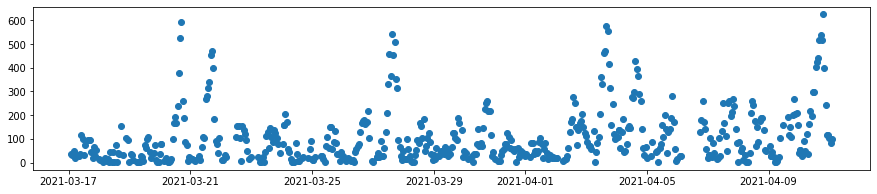

In [12]:
sub_df = df_curr_popularity[df_curr_popularity['id']=='ChIJ2R92Tl7Gx4kRO6G7NcWtNhk']
plt.figure(figsize=[15,3])
# plt.plot(sub_df['datetime_hour'], sub_df['rating_n'], 'o')
plt.plot(sub_df['datetime_hour'], sub_df['curr_popularity'], 'o')

### Get 3 info table

In [2]:
from utility import get_info, find_city_level_address

In [3]:
# import importlib
# importlib.reload(utility.find_city_level_address)

In [4]:
info_to_concat = []
info_list = ['philly_parks_info.db', 'philly_state_parks_info.db', 'nyc_parks_info.db']
for info_db in info_list:
    df = get_info(info_db)
    info_to_concat.append(df)
    
info_df = pd.concat(info_to_concat, axis=0)

In [5]:
info_df.drop_duplicates(subset='id', inplace=True, ignore_index=True)
print(info_df.shape)
info_df.head()

(4601, 5)


,id,name,lat,lng,address
0,ChIJAWkAqNL1t4kRlm4slspOSXo,Quiet Waters Park,38.937670,-76.500899,"600 Quiet Waters Park Rd, Annapolis, MD 21403,..."
1,ChIJzcow6Xb1t4kRQVE7s1AWWr8,Hillsmere Shores Community Beach,38.927212,-76.494150,"101 W Bay View Dr, Annapolis, MD 21403, USA"
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,38.930202,-76.508341,"1701-1799 Quiet Waters Park Rd, Annapolis, MD ..."
3,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,Quiet Waters Dog Park,38.931865,-76.505658,"600 Quiet Waters Park Rd, Annapolis, MD 21403,..."
4,ChIJQWcsgIn2t4kRCL0Ub363FyI,Pip Moyer Recreation Center (Annapolis Recreat...,38.963271,-76.505150,"273 Hilltop Ln, Annapolis, MD 21403, USA"


In [6]:
info_df['address_city'] = info_df['address'].apply(find_city_level_address)

Cannot find city-level address: Rothrock State Forest, Pennsylvania 16669, USA


In [7]:
info_df.head()

,id,name,lat,lng,address,address_city
0,ChIJAWkAqNL1t4kRlm4slspOSXo,Quiet Waters Park,38.937670,-76.500899,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD"
1,ChIJzcow6Xb1t4kRQVE7s1AWWr8,Hillsmere Shores Community Beach,38.927212,-76.494150,"101 W Bay View Dr, Annapolis, MD 21403, USA","Annapolis,MD"
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,38.930202,-76.508341,"1701-1799 Quiet Waters Park Rd, Annapolis, MD ...","Annapolis,MD"
3,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,Quiet Waters Dog Park,38.931865,-76.505658,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD"
4,ChIJQWcsgIn2t4kRCL0Ub363FyI,Pip Moyer Recreation Center (Annapolis Recreat...,38.963271,-76.505150,"273 Hilltop Ln, Annapolis, MD 21403, USA","Annapolis,MD"


### FourSquare park type

In [8]:
park_type_df = pd.concat([pd.read_parquet('philly_park_foursquare_types.parquet'), 
                          pd.read_parquet('nyc_park_foursquare_types.parquet')], axis=0)


In [11]:
print(park_type_df.shape)
park_type_df.head()

(4473, 8)


,id,name,lat,lng,fsq_name,fsq_type_name,fsq_type_id,fsq_type_name_simplified
0,ChIJAWkAqNL1t4kRlm4slspOSXo,Quiet Waters Park,38.937670,-76.500899,Quiet Waters Park,Park,4bf58dd8d48988d163941735,Park
1,ChIJzcow6Xb1t4kRQVE7s1AWWr8,Hillsmere Shores Community Beach,38.927212,-76.494150,Hillsmere Shores Beach and Playground,Playground,4bf58dd8d48988d1e7941735,Playground
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,38.930202,-76.508341,,,,None
3,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,Quiet Waters Dog Park,38.931865,-76.505658,Quiet Waters Dog Park,Dog Run,4bf58dd8d48988d1e5941735,Dog Run
4,ChIJQWcsgIn2t4kRCL0Ub363FyI,Pip Moyer Recreation Center (Annapolis Recreat...,38.963271,-76.505150,"""Pip"" Moyer Recreation Center",Gym,4bf58dd8d48988d176941735,Athletics & Sports


In [12]:
park_type_df['fsq_type_name_simplified'].unique()

array(['Park', 'Playground', None, 'Dog Run', 'Athletics & Sports',
       'Other Great Outdoors', 'Harbor / Marina', 'Plaza',
       'Arts & Entertainment', 'State / Provincial Park', 'Campground',
       'River', 'Travel & Transport', 'Shop & Service', 'Trail',
       'Scenic Lookout', 'Professional & Other Places', 'Bike Trail',
       'Nature Preserve', 'Outdoors & Recreation', 'Beach', 'Field',
       'Lake', 'Fishing Spot', 'Pool', 'Farm', 'Bridge',
       'Botanical Garden', 'College & University', 'Nightlife Spot',
       'Cemetery', 'Food', 'Vineyard', 'National Park',
       'Recreation Center', 'Garden', 'Sculpture Garden', 'Ski Area',
       'Island', 'Pedestrian Plaza', 'Forest', 'Waterfall', 'Picnic Area',
       'Roof Deck', 'Waterfront'], dtype=object)

In [14]:
# add fsq_type to info_df
info_df_wt_fsq_type = info_df.merge(park_type_df[['id', 'fsq_type_name_simplified']], how='left', on='id')
info_df_wt_fsq_type.head()

,id,name,lat,lng,address,address_city,fsq_type_name_simplified
0,ChIJAWkAqNL1t4kRlm4slspOSXo,Quiet Waters Park,38.937670,-76.500899,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD",Park
1,ChIJzcow6Xb1t4kRQVE7s1AWWr8,Hillsmere Shores Community Beach,38.927212,-76.494150,"101 W Bay View Dr, Annapolis, MD 21403, USA","Annapolis,MD",Playground
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,38.930202,-76.508341,"1701-1799 Quiet Waters Park Rd, Annapolis, MD ...","Annapolis,MD",None
3,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,Quiet Waters Dog Park,38.931865,-76.505658,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD",Dog Run
4,ChIJQWcsgIn2t4kRCL0Ub363FyI,Pip Moyer Recreation Center (Annapolis Recreat...,38.963271,-76.505150,"273 Hilltop Ln, Annapolis, MD 21403, USA","Annapolis,MD",Athletics & Sports


In [16]:
# add state parks to info_df_wt_fsq_type (only when fsq_type_name_simplified is none)
philly_state_park_id = get_info('philly_state_parks_info.db')['id']

park_id_missing_fsq_type = info_df_wt_fsq_type[info_df_wt_fsq_type['fsq_type_name_simplified'].isna()]['id']
state_park_id = set(park_id_missing_fsq_type).intersection(set(philly_state_park_id))

info_df_wt_fsq_type.set_index('id', inplace=True)
info_df_wt_fsq_type.loc[state_park_id, ['fsq_type_name_simplified']] = 'State / Provincial Park'

,id,name,lat,lng,address,address_city,fsq_type_name_simplified
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,38.930202,-76.508341,"1701-1799 Quiet Waters Park Rd, Annapolis, MD ...","Annapolis,MD",None
6,ChIJP75lm3n2t4kRVKf9vxXsiIc,K&B True Value,38.950865,-76.493465,"912 Forest Dr, Annapolis, MD 21403, USA","Annapolis,MD",None
12,ChIJ1fLP-rL3t4kRxKPHIzItFKA,Forrest Sherman Field,38.988533,-76.488479,"Naval Academy, MD 21402, USA","Naval Academy,MD",None
14,ChIJ197KK1n2t4kRrrcKSw31pRs,Lafayette Waterfront Park,38.973137,-76.499564,"199 Lafayette Ave, Annapolis, MD 21401, USA","Annapolis,MD",None
16,ChIJOTEnI3T_t4kRfFW16z0a2yI,Rock Creek Park,39.156250,-76.512542,"79 Bar Harbor Rd, Riviera Beach, MD 21122, USA","Riviera Beach,MD",None
...,...,...,...,...,...,...,...
4590,ChIJ8dAWhlb0wokRR4C3I0AEMFA,Field of Dreams Park,40.826617,-73.892165,"960 E 167th St, The Bronx, NY 10459, USA","The Bronx,NY",None
4591,ChIJ3VYYt2b0wokRQgCLmg9AOIQ,Walter Gladwin Park,40.845250,-73.895234,"E 175 St to, E Tremont Ave, The Bronx, NY 1045...","The Bronx,NY",None
4593,ChIJHc9FHnz0wokRjqgBnzjzgbc,Washington Park,40.855706,-73.893685,"457 E 183rd St, The Bronx, NY 10458, USA","The Bronx,NY",None
4595,ChIJERqo91X0wokRvVGWy1vGC8g,Steven Dougwillo Park,40.824963,-73.888870,"1100 E 165th St, The Bronx, NY 10459, USA","The Bronx,NY",None


In [77]:
# fill in the rest with 'Park'
info_df_wt_fsq_type = info_df_wt_fsq_type.reset_index()
info_df_wt_fsq_type.loc[np.where(info_df_wt_fsq_type['fsq_type_name_simplified'].isna())[0], 
                        ['fsq_type_name_simplified']] = 'Park'

In [90]:
info_df_wt_fsq_type.head()

,id,name,lat,lng,address,address_city,fsq_type_name_simplified
0,ChIJAWkAqNL1t4kRlm4slspOSXo,Quiet Waters Park,38.937670,-76.500899,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD",Park
1,ChIJzcow6Xb1t4kRQVE7s1AWWr8,Hillsmere Shores Community Beach,38.927212,-76.494150,"101 W Bay View Dr, Annapolis, MD 21403, USA","Annapolis,MD",Playground
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,38.930202,-76.508341,"1701-1799 Quiet Waters Park Rd, Annapolis, MD ...","Annapolis,MD",Park
3,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,Quiet Waters Dog Park,38.931865,-76.505658,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD",Dog Run
4,ChIJQWcsgIn2t4kRCL0Ub363FyI,Pip Moyer Recreation Center (Annapolis Recreat...,38.963271,-76.505150,"273 Hilltop Ln, Annapolis, MD 21403, USA","Annapolis,MD",Athletics & Sports


## include fsq_type and address_city to df_curr_popularity

In [94]:
df_curr_popularity = df_curr_popularity.merge(info_df_wt_fsq_type[['id', 'address_city', 'fsq_type_name_simplified']], 
                        how='left', on='id')

## merge curr_popularity and weather tabel

In [114]:
df_popularity = df_curr_popularity.merge(df_weather, how='left', left_on=['address_city', 'datetime_hour'], 
                         right_on=['location', 'datetime'])

In [117]:
df_popularity.columns

Index(['datetime_hour', 'id', 'curr_popularity', 'rating_n', 'request_id',
       'address_city', 'fsq_type_name_simplified', 'datetimeEpoch', 'temp',
       'feelslike', 'humidity', 'dew', 'precip', 'precipprob', 'snow',
       'snowdepth', 'preciptype', 'windgust', 'windspeed', 'winddir',
       'pressure', 'visibility', 'cloudcover', 'solarradiation', 'solarenergy',
       'uvindex', 'conditions', 'datetime', 'location', 'latitude',
       'longitude'],
      dtype='object')

In [120]:
# the ones without temp but with address_city
df_popularity.loc[df_popularity['temp'].isna() & ~df_popularity['address_city'].isna(), 
                  ['address_city', 'location', 'datetime', 'datetime_hour']]


,address_city,location,datetime,datetime_hour
4539,"Elverson,PA",NaN,NaT,2021-03-19 04:00:00
4576,"Elverson,PA",NaN,NaT,2021-03-19 05:00:00
4617,"Elverson,PA",NaN,NaT,2021-03-19 06:00:00
4683,"Elverson,PA",NaN,NaT,2021-03-19 07:00:00
4698,"Conshohocken,PA",NaN,NaT,2021-03-19 07:00:00
...,...,...,...,...
326465,"Riverside,NJ",NaN,NaT,2021-03-26 16:00:00
326528,"Conshohocken,PA",NaN,NaT,2021-03-26 16:00:00
326530,"Chester,MD",NaN,NaT,2021-03-26 16:00:00
327047,"Chester,MD",NaN,NaT,2021-03-26 18:00:00


In [135]:
df_popularity.loc[df_popularity['temp'].isna() & (df_popularity['address_city'] == 'Paterson,NJ')]

,datetime_hour,id,curr_popularity,rating_n,request_id,address_city,fsq_type_name_simplified,datetimeEpoch,temp,feelslike,...,visibility,cloudcover,solarradiation,solarenergy,uvindex,conditions,datetime,location,latitude,longitude
222626,2021-04-11 00:00:00,ChIJS4XXJM_9wokRi4GvZ-DecfM,51.5,523.0,ChIJS4XXJM_9wokRi4GvZ-DecfM,"Paterson,NJ",Park,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
222684,2021-04-11 00:00:00,ChIJdTSF-9z9wokRj0-PHUdG8WE,53.0,603.0,ChIJdTSF-9z9wokRj0-PHUdG8WE,"Paterson,NJ",Park,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
222884,2021-04-11 01:00:00,ChIJS4XXJM_9wokRi4GvZ-DecfM,26.0,523.0,ChIJS4XXJM_9wokRi4GvZ-DecfM,"Paterson,NJ",Park,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
222935,2021-04-11 01:00:00,ChIJdTSF-9z9wokRj0-PHUdG8WE,52.0,603.0,ChIJdTSF-9z9wokRj0-PHUdG8WE,"Paterson,NJ",Park,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
223087,2021-04-11 02:00:00,ChIJS4XXJM_9wokRi4GvZ-DecfM,51.0,523.0,ChIJS4XXJM_9wokRi4GvZ-DecfM,"Paterson,NJ",Park,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
223116,2021-04-11 02:00:00,ChIJdTSF-9z9wokRj0-PHUdG8WE,21.0,603.0,ChIJdTSF-9z9wokRj0-PHUdG8WE,"Paterson,NJ",Park,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [127]:
no_weather_cities = df_popularity.loc[
    df_popularity['temp'].isna() & ~df_popularity['address_city'].isna(), 'address_city'].unique().tolist()

all_weather_cities = df_weather['location'].unique().tolist()

# city not queried for weather
cities_with_no_weather = set(no_weather_cities) - set(all_weather_cities)

In [137]:
len(set(no_weather_cities) & set(all_weather_cities))

174